 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [149]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [150]:
## Whale Returns
#Read the Whale Portfolio daily returns and clean the data

In [151]:
# Use Path to name csv file location whale_returns_csv & pd.read_csv to read in data
#check data for abnormalaties in df using head function
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [152]:
# convert dates to DateTimeIndex & drop OG 'Date' columnn 
# Check for null values & count sum of nulls using isnull and sum functions
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [153]:
# Drop null values using dropna & inplace=True to keep df w/ valid entries in df 
# run sum of isnull functions again to check your work: all outputs should be 0
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [154]:
# Use Path to name csv file location algo_returns_csv
# Use pandas library and read_csv function to read in csv as dataframe with new name algo_returns_df
# quickly check df for abnormalaties using head function
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [155]:
# convert dates to DateTimeIndex & drop OG 'Date' columnn 
# Check for null values & count sum of nulls using isnull and sum functions
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)
algo_returns_df.isnull().sum()



Algo 1    0
Algo 2    6
dtype: int64

In [156]:
# Drop null values using dropna & inplace=True to keep df w/ valid entries in df 
# run sum of isnull functions again to check your work: all outputs should be 0
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [157]:
# Reading S&P 500 Closing Prices
# Use Path to name csv file location sp500_history_csv
#Use pandas library and read_csv function to read in csv as dataframe with new name sp500_history_df
#quickly check df for abnormalities using head function
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [158]:
# Use dtypes attribute to view datatypes in dataframe
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [159]:
# Fix Data Types
# convert dates to DateTimeIndex & drop OG 'Date' columnn
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.drop(columns=['Date'], inplace=True)

# for 'Close' column drop "$" & assign dtype as 'float'
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$',' ')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [160]:
# Calculate Daily Returns
# New var = daily_returns, run pct_change function against sp500_history_df & run head function to verify output is accurate
daily_returns = sp500_history_df.pct_change()
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [161]:
# Drop nulls
# Drop nulls from daily_returns using .dropna, check count of nulls w/ .isnull().sum(), check output w/ .head()
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()
daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [162]:
# Rename Column
# Rename Close column to S&P 500 - use .rename & choose prev column name ("Close") chan
daily_returns = daily_returns.rename(columns={
    "Close": "S&P 500"
})
daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [166]:
# Concatenate all DataFrames into a single DataFrame
# var combined_df = use Pandas concat function for 3 df - ([whale_returns_df, algo_returns_df, sp500_history_df]), axis=columns, join=inner
combined_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns], axis="columns", join="inner")
#combined_df.set_index(pd.to_datetime(combined_df['Date'], infer_datetime_format=True), inplace=True)
#(pd.to_datetime(df['Date'], infer_datetime_format=True), inplace=True)
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

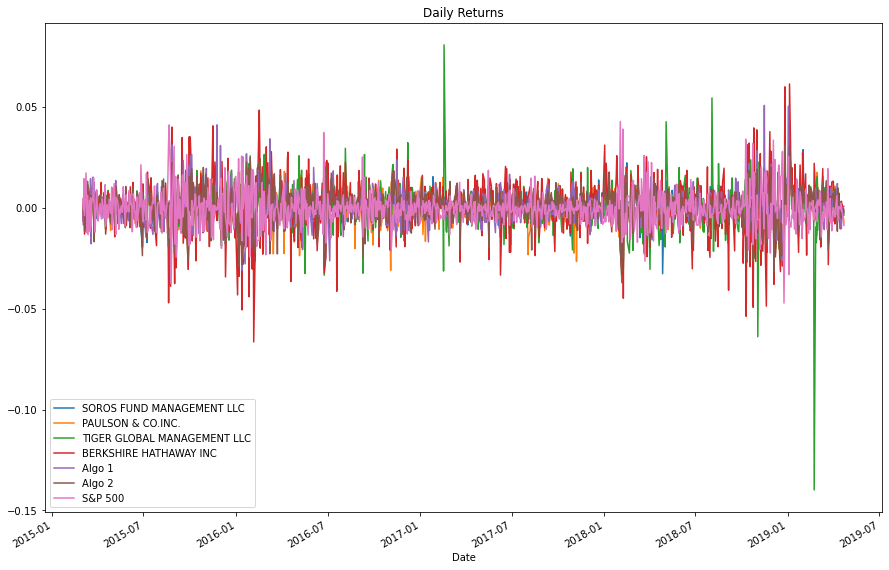

In [180]:
# Plot daily returns
# plot daily returns w/ plot function - arg: title Daily Returns
#adjusted figsize w/ arg: figsize, original output was too small
combined_df.plot(title="Daily Returns", figsize=(15,10))

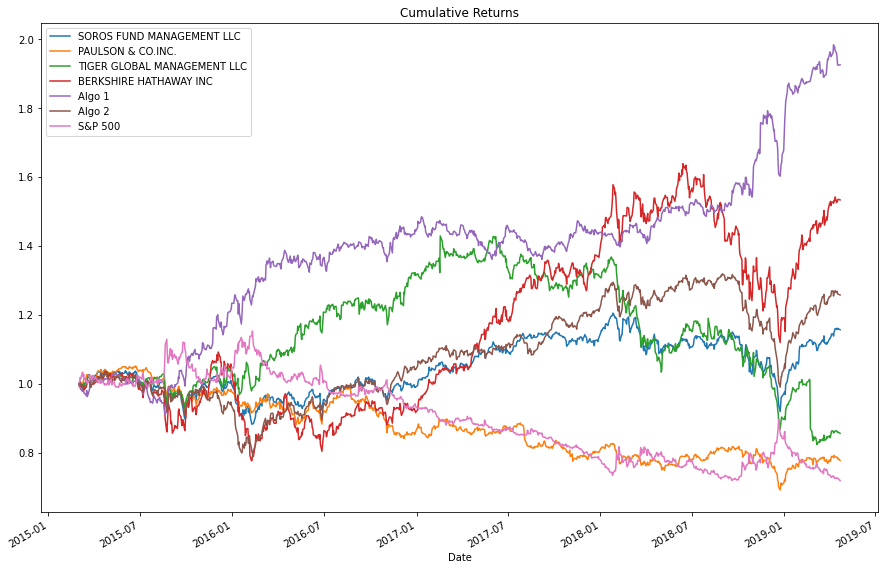

In [179]:
# Plot cumulative returns
# calculate cumulative returns w/ cumprod function, keep arg for figsize & change title to "Cumulative Returns"
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(title="Cumulative Returns", figsize=(15,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

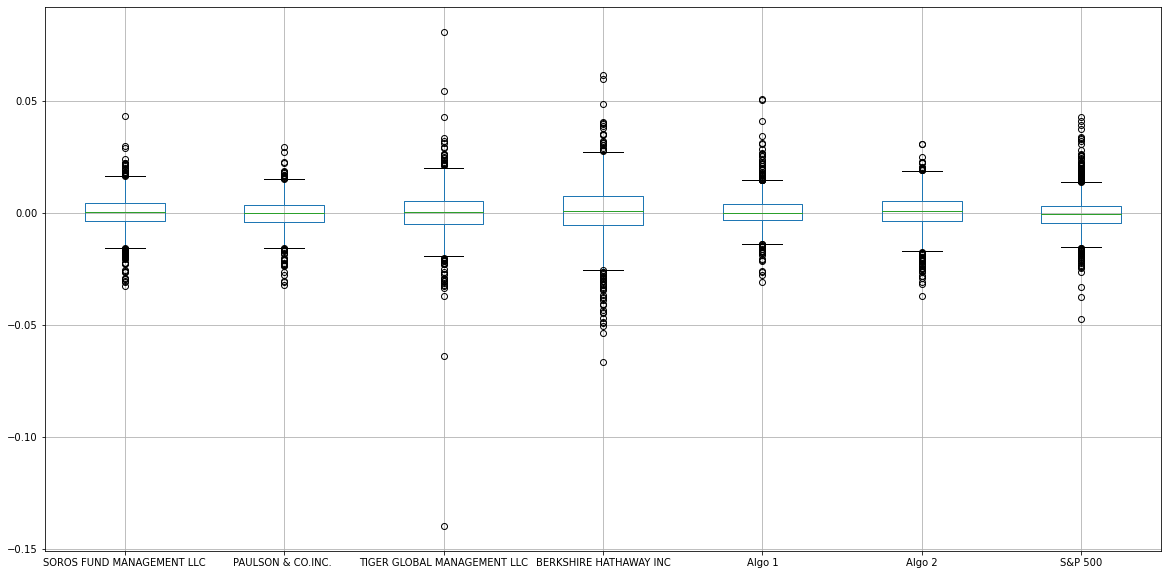

In [184]:
# Box plot to visually show risk
# use combined_df var for boxplot - changed figsize to 20,10 for more space on x-axis
# title is not an arg for boxplot function
combined_df.boxplot(figsize=(20,10))

In [193]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. use .std function to calculate on combined_df var
# Which portfolios are riskier than the S&P 500?
print("Standard Deviation for each Portfolio")
print(combined_df.std())

Standard Deviation for each Portfolio
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64


In [194]:
# Determine which portfolios are riskier than the S&P 500
#Tiger Global Management (.010897), Berkshire Hathaway Inc (.012919) are both higher numbers = more risky
print("Two portfolios are riskier than the S&P500. Tiger Global Management(0.010897) and Berkshire Hathaway Inc(0.012919)")

Two portfolios are riskier than the S&P500. Tiger Global Management(0.010897) and Berkshire Hathaway Inc(0.012919)


In [195]:
# Calculate the annualized standard deviation (252 trading days)
# np.sqrt of annual variance = combined_dv.var()*252
annual_var = (combined_df.var()*252)
annual_std = np.sqrt(annual_var)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

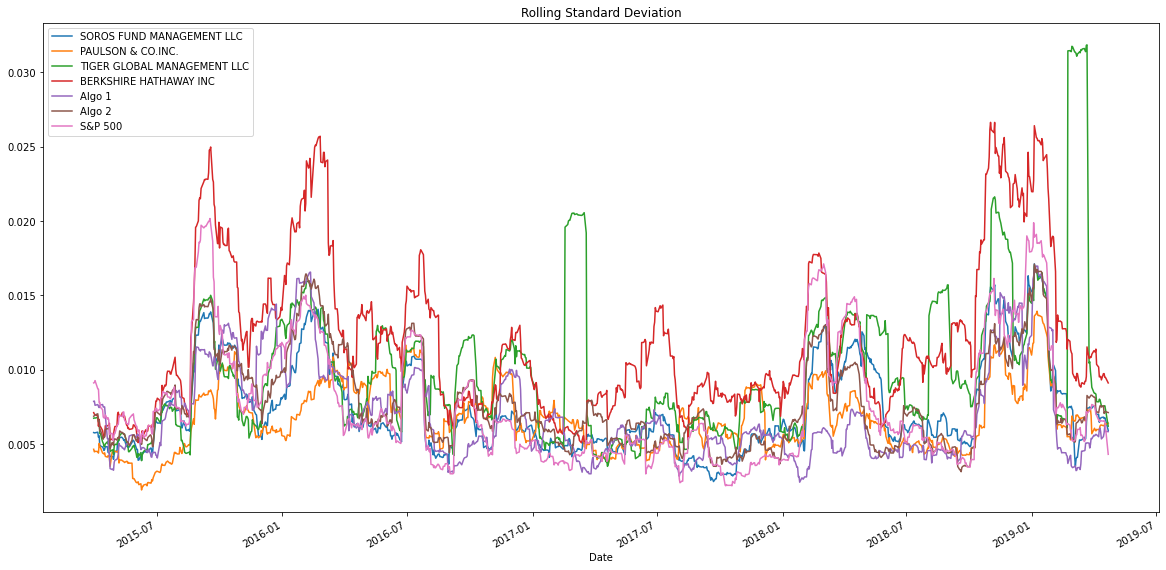

In [197]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(title="Rolling Standard Deviation",figsize=(20,10))

In [198]:
# Construct a correlation table
# new var combined_corr using .corr function on combined_df var
combined_corr = combined_df.corr()
combined_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [208]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# Using Algo 1 to compare -- calculate .cov against S&P 500 for covariance & calculate .var against S&P 500 for var
#beta = cov/var - name of var algo_beta
covariance = combined_df['Algo 1'].cov(combined_df['S&P 500'])
variance = combined_df['Algo 1'].var()
algo_beta = (covariance/variance)
print(f"Algo 1 Beta: {algo_beta}")

Algo 1 Beta: -0.03825878394465824


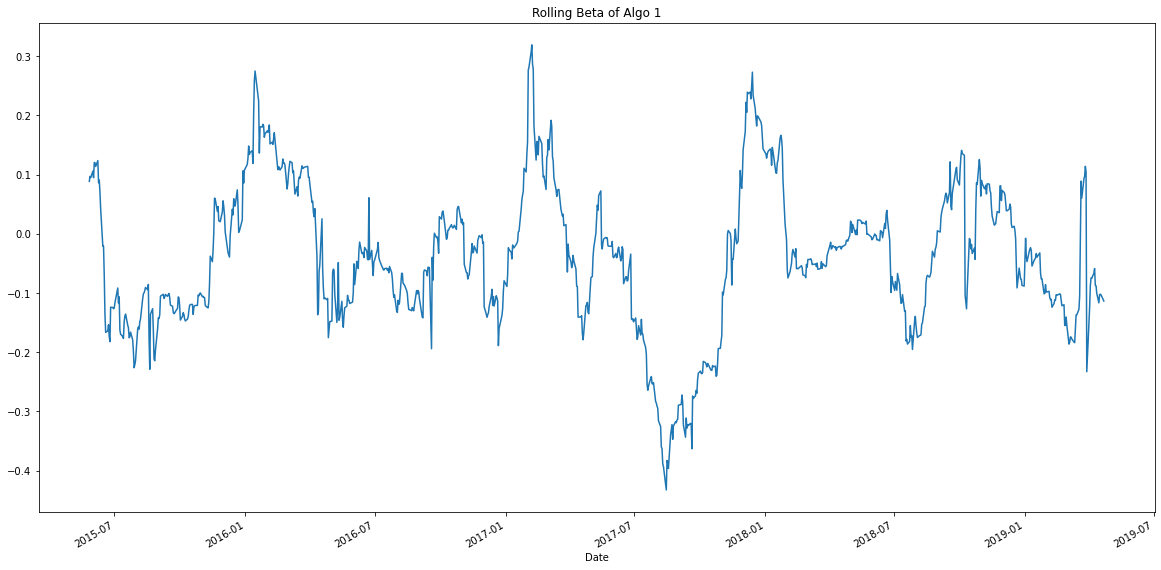

In [212]:
# Calculate a rolling window using the exponentially weighted moving average.
# beta = covariance/variance - need 2 new "rolling" covariance and variance for output
# var rolling_cov = Algo 1.rolling w/ 60 day window, against S&P 500
rolling_cov = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500'])
# var rolling_variance = S&P 500 .rolling w/ 60 day window
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta = (rolling_cov/rolling_variance)
rolling_beta.plot(figsize=(20, 10), title='Rolling Beta of Algo 1')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [213]:
# Calculate annualized Sharpe Ratios
# annual = 252 days
# sharpe ratio = (df.mean*252)/(df.std*sqrt252)
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

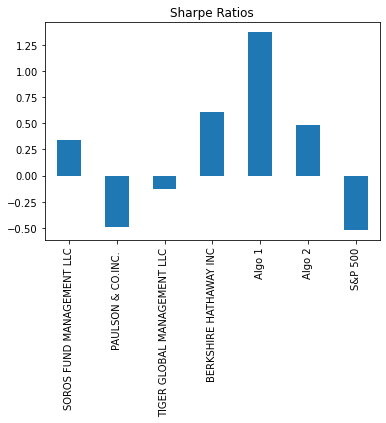

In [216]:
# Visualize the sharpe ratios as a bar plot
# use .plot & arg kind-"bar", title="Sharpe Ratios", adjust figsize if needed
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

In [217]:
print("Based on this performance metric Algo 1 and Algo 2 both outperform the market and whales")

Based on this performance metric Algo 1 and Algo 2 both outperform the market and whales


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [306]:
# Read the first stock
#AAPL = aapl_historical.csv, arg: index column: "Trade DATE", infer_datetime_format=True, parse_dates=True
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_df.drop(columns=['AAPL1'], axis=1, inplace= True)

In [307]:
# Read the second stock
#COST = cost_historical.csv, arg: index column: "Trade DATE", infer_datetime_format=True, parse_dates=True
cost_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_df.drop(columns=['COST1'], axis=1,inplace = True)

In [308]:
# Read the third stock
#GOOG = goog_historical.csv, arg: index column: "Trade DATE", infer_datetime_format=True, parse_dates=True
goog_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)

In [309]:
# Concatenate all stocks into a single DataFrame
# var name combined_df2 - use pandas concat to combine aapl_df, cost_df, and goog_df
combined_df2 = pd.concat([aapl_df,cost_df,goog_df], axis='columns', join='inner')
combined_df2.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [321]:
# Reset the index
#sort index oldest > newest
#index "Trade DATE" created when reading in csv stock data
combined_df2.sort_index(inplace=True)

In [322]:
# Pivot so that each column of prices represents a unique symbol
#renamed & dropped columns to create columns with NOCP listed when reading in csv stock data
combined_df2.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [323]:
# Drop Nulls
# .dropna
combined_df2.dropna()
combined_df2.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [324]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# steps: calculate returns w/ new var, .dropna, .dot w/ weights to calculate returns?
# step 1: calculate returns
returns = combined_df2.pct_change()
#step 2: dropna on returns
returns.dropna()
#step 3: .dot(weights) - create new variable for this weighted_returns
weighted_returns = returns.dot(weights)
calculated_returns = pd.DataFrame(weighted_returns)
calculated_returns.head()

,0
Trade DATE,
2018-05-11,NaN
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [329]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# combine weighted_returns & combined_df, rename 0 column to "Custom Returns", sort_index to ensure data is sorted oldest>newest, drop nulls, 
combined_df3 = pd.concat([weighted_returns, combined_df], axis='columns', join='inner')
combined_df3.rename(columns= {0: "Custom Returns"}, inplace=True)
combined_df3.sort_index()
combined_df3.dropna(inplace=True)
combined_df3

,Custom Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
...,...,...,...,...,...,...,...,...
2019-04-15,0.007522,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#dropna used during concat & combined_df3 var creation

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [331]:
# Risk
# Calculate the standard deviation & variance combined_df3 252 trading days
combined_df3.std()
annual_var2 = (combined_df3.var()*252)
annual_std2 = np.sqrt(annual_var2)
annual_std2

Custom Returns                 0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
dtype: float64

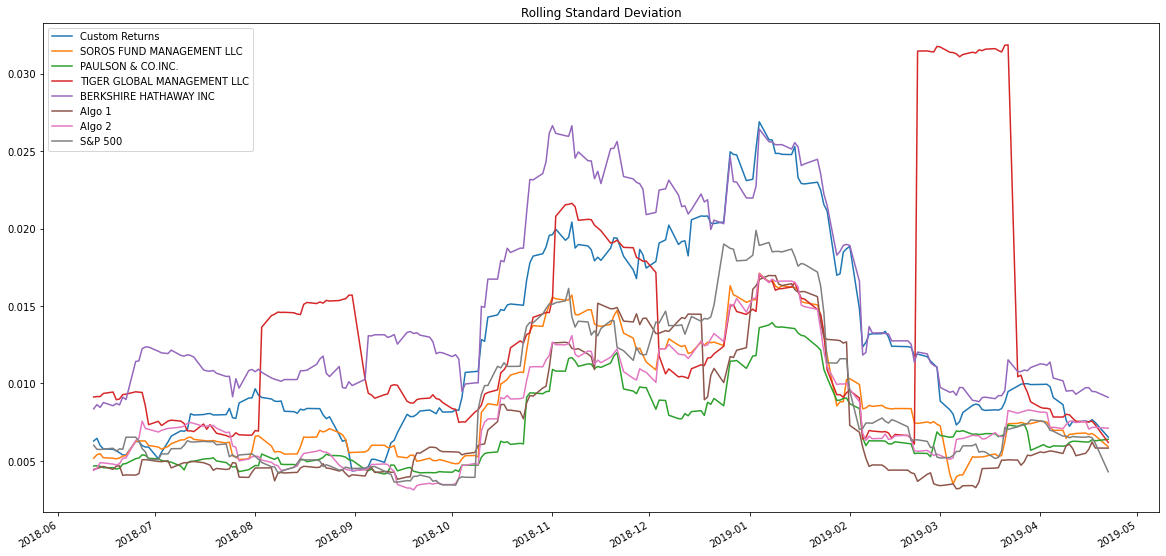

In [332]:
# Rolling
# Calculate and plot the rolling standard deviation for the combined_df3 using a 21 trading day window
combined_df3.rolling(window=21).std().plot(title="Rolling Standard Deviation",figsize=(20,10))

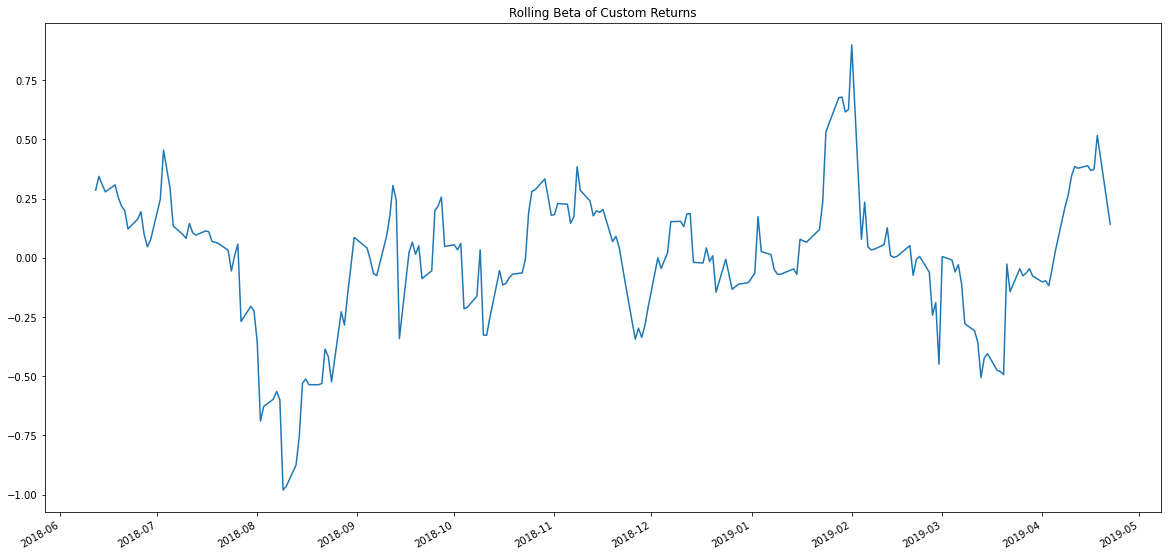

In [334]:
# Calculate a rolling window using the exponentially weighted moving average.
# beta = covariance/variance - need 2 new "rolling" covariance and variance for output
# var rolling_cov2 = Custom Returns.rolling w/ 21 day window, against S&P 500 on df3
rolling_cov2 = combined_df3['Custom Returns'].rolling(window=21).cov(combined_df3['S&P 500'])
# var rolling_variance2 = S&P 500 .rolling w/ 60 day window
rolling_variance2 = combined_df3['S&P 500'].rolling(window=21).var()
rolling_beta2 = (rolling_cov2/rolling_variance2)
rolling_beta2.plot(figsize=(20, 10), title='Rolling Beta of Custom Returns')

In [335]:
# Annualized Sharpe Ratios
# sharpe_ratio = df3.mean*252/df3.std*sqrt(252)
#use numpy library for .sqrt
sharpe_ratios2 = (combined_df3.mean() * 252) / ((combined_df3).std() * np.sqrt(252))
sharpe_ratios2

Custom Returns                 0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
dtype: float64

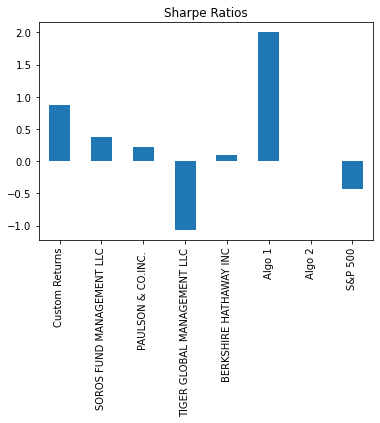

In [336]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind="bar", title="Sharpe Ratios")

In [337]:
# Create a correlation analysis
# df3 .corr function
combined_df3.corr()

,Custom Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Custom Returns,1.000000,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603
SOROS FUND MANAGEMENT LLC,0.732548,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256
PAULSON & CO.INC.,0.643828,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862
TIGER GLOBAL MANAGEMENT LLC,0.390961,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881
BERKSHIRE HATHAWAY INC,0.800558,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832
Algo 1,0.260331,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478
Algo 2,0.739020,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540
S&P 500,0.005603,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000


In [338]:
# Beta
# YOUR CODE HERE
covariance2 = combined_df3['Custom Returns'].cov(combined_df3['S&P 500'])
variance2 = combined_df3['Custom Returns'].var()
custom_returns_beta = (covariance2/variance2)
print(f"Custom Returns Beta: {custom_returns_beta}")

Custom Returns Beta: 0.0040370539875284025
